In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torchvision import datasets, transforms

In [18]:
# Hyper parameters
EPOCH = 10
BATCH_SIZE = 64
LR_G = 0.0001
LR_D = 0.0001

In [19]:
# GPU
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print('GPU State:', device)

transform = transforms.ToTensor()
data_train = datasets.MNIST(root="./mnist",
                            transform=transform,
                            train=True,
                            download=True)
data_loader = torch.utils.data.DataLoader(dataset=data_train, batch_size=BATCH_SIZE, shuffle=True)

GPU State: cpu


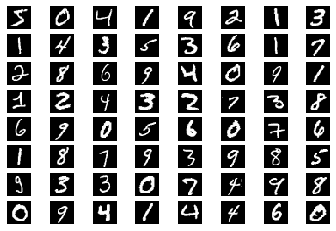

In [20]:
def showImg(imgs):
    sqrtn = int(np.ceil(np.sqrt(imgs.shape[0])))
    for index, img in enumerate(imgs):
        plt.subplot(sqrtn, sqrtn, index+1)
        plt.imshow(img.reshape(28, 28), 'gray')
        plt.axis(False)
    plt.show()
showImg(data_loader.dataset.data[:64])

In [21]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.model(input)

In [22]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(100, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784)
        )

    def forward(self, z):
        return self.model(z)

In [23]:
D = Discriminator().to(device)
G = Generator().to(device)
loss_f = nn.BCELoss().to(device)
D_optim = torch.optim.Adam(D.parameters(), lr=LR_D)
G_optim = torch.optim.Adam(G.parameters(), lr=LR_G)
print(D)
print(G)

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=1, bias=True)
    (5): Sigmoid()
  )
)
Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
  )
)


In [33]:
print(D_input.size())


torch.Size([64, 1])


start epoch 0...
0/10, 0/938, D_loss: 0.698  G_loss: 0.709
0/10, 100/938, D_loss: 0.345  G_loss: 1.240
0/10, 200/938, D_loss: 0.310  G_loss: 1.508
0/10, 300/938, D_loss: 0.309  G_loss: 1.707
0/10, 400/938, D_loss: 0.274  G_loss: 1.588
0/10, 500/938, D_loss: 0.294  G_loss: 1.725
0/10, 600/938, D_loss: 0.242  G_loss: 1.568
0/10, 700/938, D_loss: 0.226  G_loss: 1.432
0/10, 800/938, D_loss: 0.285  G_loss: 1.165
0/10, 900/938, D_loss: 0.089  G_loss: 2.233


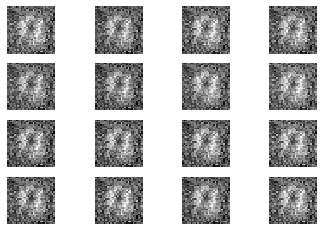

start epoch 1...
1/10, 0/938, D_loss: 0.204  G_loss: 1.860
1/10, 100/938, D_loss: 0.108  G_loss: 2.344
1/10, 200/938, D_loss: 0.064  G_loss: 2.923
1/10, 300/938, D_loss: 0.101  G_loss: 2.643
1/10, 400/938, D_loss: 0.035  G_loss: 3.387
1/10, 500/938, D_loss: 0.075  G_loss: 3.068
1/10, 600/938, D_loss: 0.059  G_loss: 3.028
1/10, 700/938, D_loss: 0.051  G_loss: 2.899
1/10, 800/938, D_loss: 0.057  G_loss: 2.856
1/10, 900/938, D_loss: 0.031  G_loss: 3.463


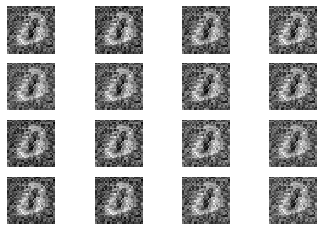

start epoch 2...
2/10, 0/938, D_loss: 0.024  G_loss: 3.285
2/10, 100/938, D_loss: 0.134  G_loss: 3.936
2/10, 200/938, D_loss: 0.025  G_loss: 3.716
2/10, 300/938, D_loss: 0.037  G_loss: 3.852
2/10, 400/938, D_loss: 0.050  G_loss: 3.991
2/10, 500/938, D_loss: 0.027  G_loss: 3.327
2/10, 600/938, D_loss: 0.016  G_loss: 4.601
2/10, 700/938, D_loss: 0.069  G_loss: 3.825
2/10, 800/938, D_loss: 0.050  G_loss: 4.209
2/10, 900/938, D_loss: 0.064  G_loss: 4.488


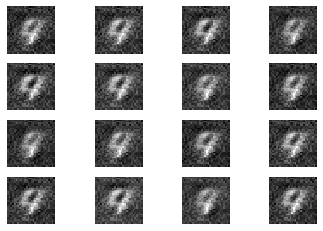

start epoch 3...
3/10, 0/938, D_loss: 0.037  G_loss: 5.741
3/10, 100/938, D_loss: 0.130  G_loss: 3.279
3/10, 200/938, D_loss: 0.042  G_loss: 4.956
3/10, 300/938, D_loss: 0.036  G_loss: 4.203
3/10, 400/938, D_loss: 0.062  G_loss: 4.159
3/10, 500/938, D_loss: 0.068  G_loss: 4.568
3/10, 600/938, D_loss: 0.081  G_loss: 4.049
3/10, 700/938, D_loss: 0.023  G_loss: 5.568
3/10, 800/938, D_loss: 0.085  G_loss: 3.443
3/10, 900/938, D_loss: 0.065  G_loss: 3.704


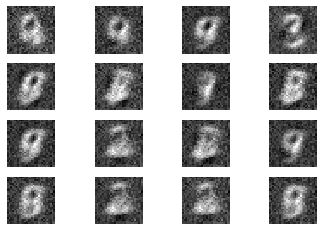

start epoch 4...
4/10, 0/938, D_loss: 0.026  G_loss: 3.659
4/10, 100/938, D_loss: 0.034  G_loss: 3.871
4/10, 200/938, D_loss: 0.062  G_loss: 4.193
4/10, 300/938, D_loss: 0.045  G_loss: 3.731
4/10, 400/938, D_loss: 0.052  G_loss: 5.556
4/10, 500/938, D_loss: 0.043  G_loss: 3.631
4/10, 600/938, D_loss: 0.033  G_loss: 3.652
4/10, 700/938, D_loss: 0.037  G_loss: 3.989
4/10, 800/938, D_loss: 0.062  G_loss: 4.479
4/10, 900/938, D_loss: 0.049  G_loss: 4.058


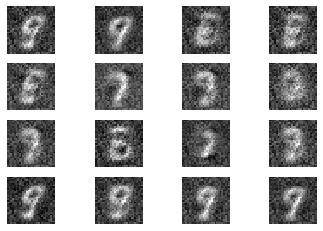

start epoch 5...
5/10, 0/938, D_loss: 0.028  G_loss: 3.869
5/10, 100/938, D_loss: 0.009  G_loss: 4.526
5/10, 200/938, D_loss: 0.030  G_loss: 4.145
5/10, 300/938, D_loss: 0.111  G_loss: 5.283
5/10, 400/938, D_loss: 0.018  G_loss: 4.705
5/10, 500/938, D_loss: 0.073  G_loss: 4.683
5/10, 600/938, D_loss: 0.015  G_loss: 4.911
5/10, 700/938, D_loss: 0.064  G_loss: 4.870
5/10, 800/938, D_loss: 0.082  G_loss: 4.581
5/10, 900/938, D_loss: 0.045  G_loss: 4.713


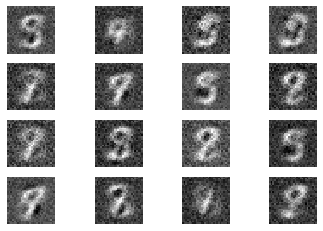

start epoch 6...
6/10, 0/938, D_loss: 0.013  G_loss: 5.774
6/10, 100/938, D_loss: 0.062  G_loss: 5.029
6/10, 200/938, D_loss: 0.017  G_loss: 4.436
6/10, 300/938, D_loss: 0.038  G_loss: 3.546
6/10, 400/938, D_loss: 0.042  G_loss: 5.108
6/10, 500/938, D_loss: 0.017  G_loss: 4.827
6/10, 600/938, D_loss: 0.055  G_loss: 3.913
6/10, 700/938, D_loss: 0.026  G_loss: 4.838
6/10, 800/938, D_loss: 0.029  G_loss: 4.060
6/10, 900/938, D_loss: 0.015  G_loss: 4.734


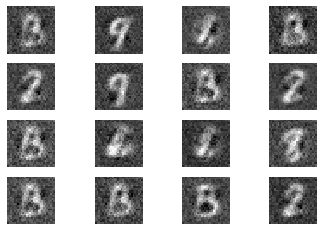

start epoch 7...
7/10, 0/938, D_loss: 0.041  G_loss: 4.633
7/10, 100/938, D_loss: 0.021  G_loss: 5.152
7/10, 200/938, D_loss: 0.048  G_loss: 5.081
7/10, 300/938, D_loss: 0.042  G_loss: 4.868
7/10, 400/938, D_loss: 0.013  G_loss: 5.399
7/10, 500/938, D_loss: 0.037  G_loss: 4.711
7/10, 600/938, D_loss: 0.081  G_loss: 4.383
7/10, 700/938, D_loss: 0.035  G_loss: 3.988
7/10, 800/938, D_loss: 0.058  G_loss: 5.588
7/10, 900/938, D_loss: 0.029  G_loss: 5.230


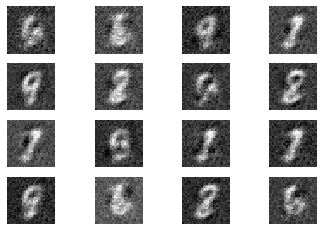

start epoch 8...
8/10, 0/938, D_loss: 0.019  G_loss: 4.540
8/10, 100/938, D_loss: 0.029  G_loss: 5.237
8/10, 200/938, D_loss: 0.030  G_loss: 4.342
8/10, 300/938, D_loss: 0.037  G_loss: 4.447
8/10, 400/938, D_loss: 0.061  G_loss: 5.646
8/10, 500/938, D_loss: 0.056  G_loss: 4.881
8/10, 600/938, D_loss: 0.052  G_loss: 3.697
8/10, 700/938, D_loss: 0.026  G_loss: 4.055
8/10, 800/938, D_loss: 0.033  G_loss: 4.239
8/10, 900/938, D_loss: 0.047  G_loss: 4.025


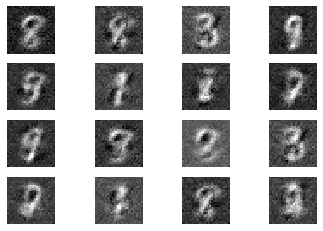

start epoch 9...
9/10, 0/938, D_loss: 0.048  G_loss: 3.915
9/10, 100/938, D_loss: 0.017  G_loss: 4.505
9/10, 200/938, D_loss: 0.062  G_loss: 3.807
9/10, 300/938, D_loss: 0.097  G_loss: 5.721
9/10, 400/938, D_loss: 0.049  G_loss: 4.252
9/10, 500/938, D_loss: 0.064  G_loss: 4.644
9/10, 600/938, D_loss: 0.038  G_loss: 4.550
9/10, 700/938, D_loss: 0.028  G_loss: 5.120
9/10, 800/938, D_loss: 0.033  G_loss: 5.311
9/10, 900/938, D_loss: 0.021  G_loss: 5.340


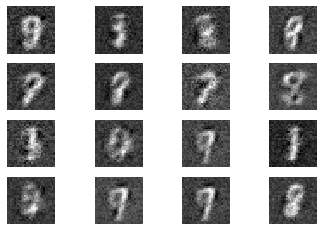

Done!!!


In [25]:
for epoch in range(EPOCH):
    print('start epoch {}...'.format(epoch))
    for i, (img, label) in enumerate(data_loader):
        
        z = torch.randn(img.shape[0], 100).to(device)
        
        real_img = img.view(-1, 784).to(device)
        fake_img = G(z).to(device)
        
        real_label = torch.ones(real_img.shape[0], 1).to(device)
        fake_label = torch.zeros(fake_img.shape[0], 1).to(device)
        
        prob_real = D(real_img)
        prob_fake = D(fake_img)

#         D_loss = - torch.mean(torch.log(prob_real) + torch.log(1. - prob_fake))
#         G_loss = torch.mean(torch.log(1. - prob_fake))

        D_input = torch.cat((prob_real, prob_fake), 0)
        D_target = torch.cat((real_label, fake_label), 0)
        
        D_loss = loss_f(D_input, D_target)      #input(64), target(128)
        G_loss = loss_f(prob_fake, real_label)

        D_optim.zero_grad()
        D_loss.backward(retain_graph=True)      # reusing computational graph
        D_optim.step()

        G_optim.zero_grad()
        G_loss.backward()
        G_optim.step()
        
        if i % 100 == 0 or i == len(data_loader):
            print('{}/{}, {}/{}, D_loss: {:.3f}  G_loss: {:.3f}'.format(epoch, EPOCH, i, len(data_loader), D_loss.item(), G_loss.item()))
            
    imgs_numpy = (fake_img.data.cpu().numpy()+1.0)/2.0
    showImg(imgs_numpy[:16])
    plt.show()
print('Done!!!')